In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import seaborn as sns

In [47]:
df = pd.read_csv("../Resale flat prices based on registration date from Jan-2017 onwards.csv")

In [48]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

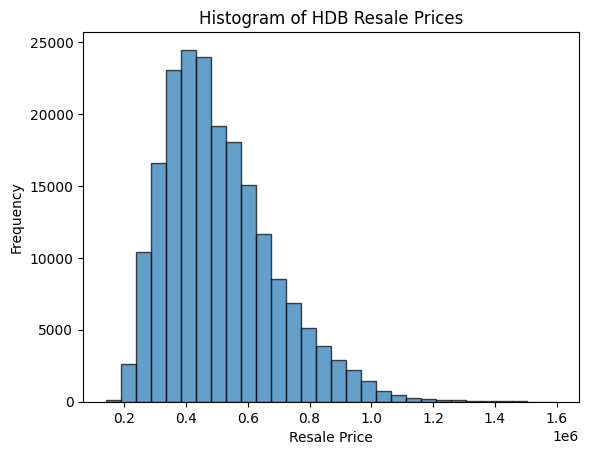

In [49]:
plt.hist(df['resale_price'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.title('Histogram of HDB Resale Prices')
plt.show()


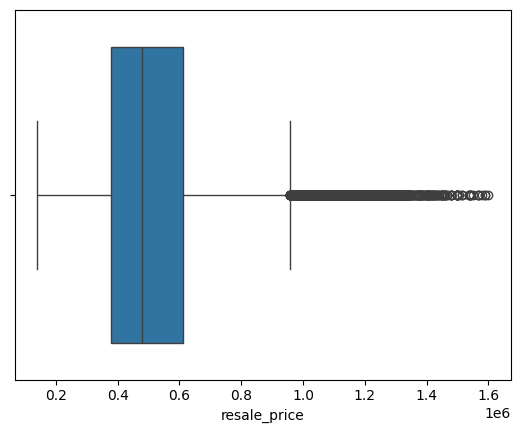

In [50]:
# Create a boxplot
sns.boxplot(x=df['resale_price'])
plt.show()

In [51]:
# Remove Outliers
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.3 * IQR
upper_limit = Q3 + 1.3 * IQR
df = df[(df['resale_price'] >= lower_limit) & (df['resale_price'] <= upper_limit)]

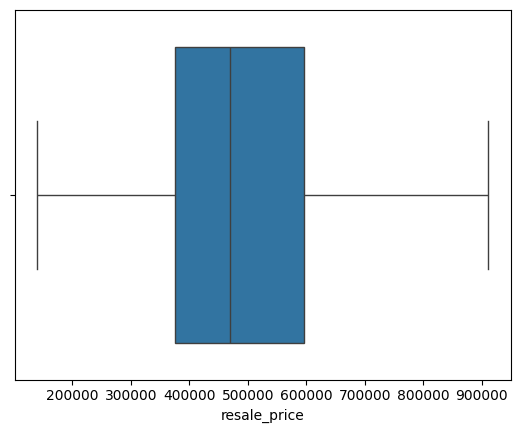

In [52]:
# Create a boxplot
sns.boxplot(x=df['resale_price'])
plt.show()

In [53]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
198037,2025-01,YISHUN,5 ROOM,265,YISHUN ST 22,01 TO 03,122.0,Improved,1986,60 years 11 months,625000.0
198038,2025-01,YISHUN,5 ROOM,511B,YISHUN ST 51,10 TO 12,113.0,Improved,2017,91 years 09 months,730000.0
198039,2025-01,YISHUN,5 ROOM,871,YISHUN ST 81,07 TO 09,122.0,Improved,1988,62 years 04 months,738000.0
198040,2025-01,YISHUN,5 ROOM,851,YISHUN ST 81,10 TO 12,127.0,Improved,1988,62 years 04 months,740000.0


In [54]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,192169.000000,192169.000000,192169.000000
mean,96.335513,1995.957735,493230.378212
std,23.707190,14.130468,155400.263777
min,31.000000,1966.000000,140000.000000
25%,76.000000,1985.000000,375000.000000
50%,93.000000,1996.000000,470000.000000
75%,112.000000,2010.000000,595000.000000
max,215.000000,2021.000000,911000.000000


In [55]:
# Feature Engineering
df['flat_age'] = 2025 - df['lease_commence_date']
df['remaining_lease_months'] = df['remaining_lease'].apply(lambda x: int(x.split()[0]) * 12 if pd.notna(x) else np.nan)

In [56]:
df = df.drop(columns=["month", "lease_commence_date", "remaining_lease", "storey_range", "block", "street_name"])

In [57]:
df_data = df

joblib.dump(df_data, 'updated_dataset.pkl')

['updated_dataset.pkl']

In [58]:
df

,town,flat_type,floor_area_sqm,flat_model,resale_price,flat_age,remaining_lease_months
0,ANG MO KIO,2 ROOM,44.0,Improved,232000.0,46,732
1,ANG MO KIO,3 ROOM,67.0,New Generation,250000.0,47,720
2,ANG MO KIO,3 ROOM,67.0,New Generation,262000.0,45,744
3,ANG MO KIO,3 ROOM,68.0,New Generation,265000.0,45,744
4,ANG MO KIO,3 ROOM,67.0,New Generation,265000.0,45,744
...,...,...,...,...,...,...,...
198037,YISHUN,5 ROOM,122.0,Improved,625000.0,39,720
198038,YISHUN,5 ROOM,113.0,Improved,730000.0,8,1092
198039,YISHUN,5 ROOM,122.0,Improved,738000.0,37,744
198040,YISHUN,5 ROOM,127.0,Improved,740000.0,37,744


In [59]:
df=pd.get_dummies(df,columns=['town', 'flat_type', 'flat_model'])

In [60]:
df

,floor_area_sqm,resale_price,flat_age,remaining_lease_months,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,44.0,232000.0,46,732,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,67.0,250000.0,47,720,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,67.0,262000.0,45,744,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,68.0,265000.0,45,744,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,67.0,265000.0,45,744,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198037,122.0,625000.0,39,720,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198038,113.0,730000.0,8,1092,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198039,122.0,738000.0,37,744,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198040,127.0,740000.0,37,744,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
X = df.drop('resale_price',axis=1)
y = df['resale_price']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [75]:
modelgbr = GradientBoostingRegressor(
    n_estimators = 2000, 
    learning_rate = 0.2,
    max_depth= 6, 
    min_samples_leaf = 16,
    max_features = 4,
    loss = "huber",
    random_state = 6
)

modelgbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, loss='huber', max_depth=6,
                          max_features=4, min_samples_leaf=16,
                          n_estimators=2000, random_state=6)

In [76]:
mse = np.mean((modelgbr.predict(X_test)-y_test)**2) #MSE
mae = np.mean(np.abs((modelgbr.predict(X_test)-y_test))) #MAE
r2_gradscore = modelgbr.score(X_test, y_test)
print(f"MSE: {mse}, MAE: {mae}, R²: {r2_gradscore}")

MSE: 1473055851.8232846, MAE: 28529.338549177108, R²: 0.9388833296643974


In [77]:
joblib.dump(modelgbr, "gbr_model.pkl")

['gbr_model.pkl']

In [66]:
# Gradient Boosting Regressor with Grid Search
params = {
    'n_estimators': [500],
    'learning_rate': [0.2],
    'max_depth': [4],
    'min_samples_split': [10],
    'min_samples_leaf': [16],
    'max_features': ['huber'],
    'subsample': [0.8]
}

grid_search = GridSearchCV(estimator=modelgbr, param_grid=params, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\darry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\darry\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\darry\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\darry\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of GradientBoostingRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'huber' instead.

--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\darry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\darry\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\darry\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\darry\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of GradientBoostingRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'huber' instead.


In [39]:
# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2752572040.4539948
Root Mean Squared Error: 52464.960120579475
R-squared: 0.8814865587980016


In [ ]:
# Feature Importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': modelgbr.feature_importances_
}).sort_values(by="Importance", ascending=False)
print(importances)

                              Feature  Importance
1                            flat_age    0.169032
0                      floor_area_sqm    0.147491
31                   flat_type_3 ROOM    0.123340
33                   flat_type_5 ROOM    0.078713
2              remaining_lease_months    0.077375
30                   flat_type_2 ROOM    0.048428
34                flat_type_EXECUTIVE    0.046494
7                    town_BUKIT MERAH    0.028945
39               flat_model_Apartment    0.027249
41                flat_model_Improved    0.026891
43              flat_model_Maisonette    0.024598
40                    flat_model_DBSS    0.018680
21                    town_QUEENSTOWN    0.017975
27                     town_WOODLANDS    0.017371
5                         town_BISHAN    0.013724
11                 town_CHOA CHU KANG    0.012368
16                   town_JURONG WEST    0.012030
17               town_KALLANG/WHAMPOA    0.010842
28                        town_YISHUN    0.010458


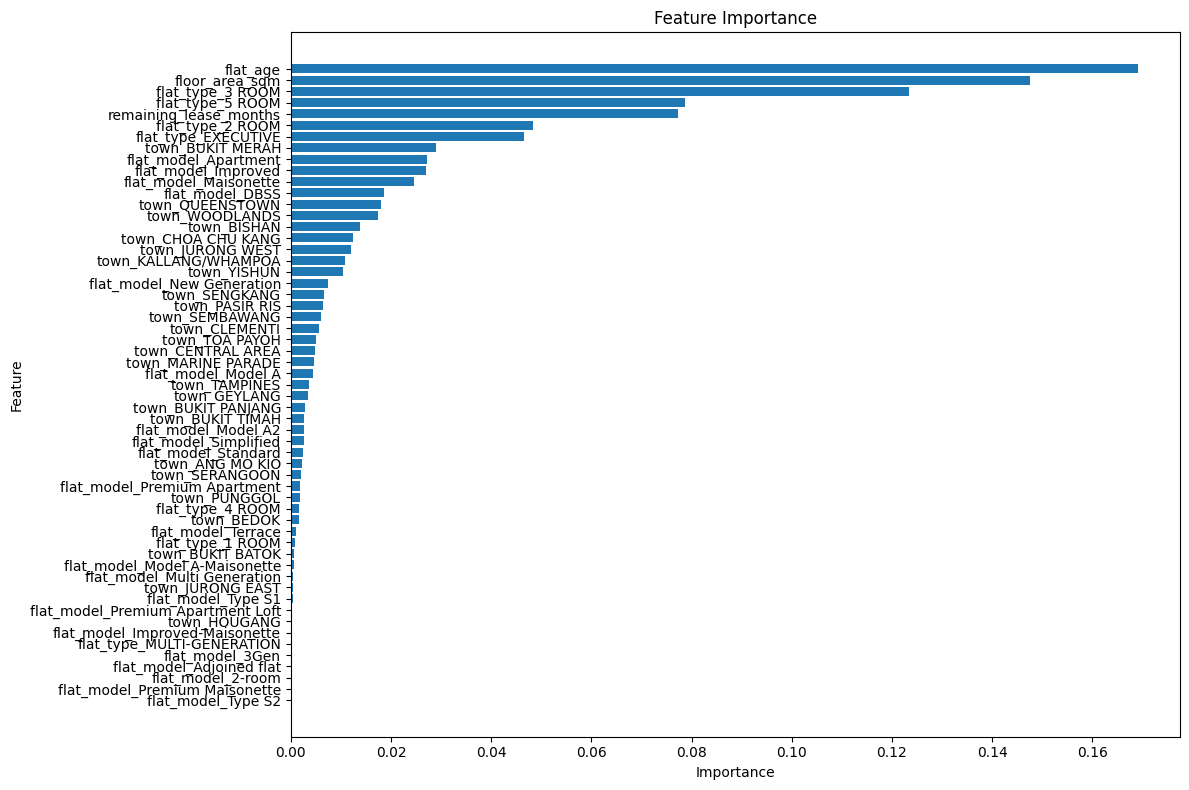

In [43]:
# Feature importance plot
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': modelgbr.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importances['Feature'], importances['Importance'], align='center')
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [44]:
joblib.dump(X.columns.tolist(), "feature_names.pkl")

['feature_names.pkl']

In [45]:
df

,floor_area_sqm,resale_price,flat_age,remaining_lease_months,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,44.0,232000.0,46,732,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,67.0,250000.0,47,720,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,67.0,262000.0,45,744,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,68.0,265000.0,45,744,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,67.0,265000.0,45,744,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198037,122.0,625000.0,39,720,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198038,113.0,730000.0,8,1092,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198039,122.0,738000.0,37,744,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198040,127.0,740000.0,37,744,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
